<a href="https://colab.research.google.com/github/ArenaHernandez/NeuralNetworks_BankChurnPrediction/blob/main/Predicting_Customer_Churn_Full_Code_Version_ArenaHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6>Predicting Customer Churn in Banking Services Using Neural Networks</font></center>
<center><font size=5> Arena Hernández </font></center>

## Problem Statement

### Context

In today's competitive banking landscape, customer churn has become a pressing concern for banks. With the rise of fintech startups and alternative banking options, customers have more choices than ever before. As a result, banks must proactively identify and address potential churn risks to maintain customer satisfaction and loyalty. By leveraging advanced analytics and machine learning techniques, banks can gain insights into customer behavior and preferences, enabling them to tailor their services and offerings to meet evolving needs.

### Objective

The main goal is to leverage neural network-based classification algorithms to develop a predictive model that can effectively determine the likelihood of customer churn. By analyzing various aspects of the banking service, including customer demographics, transaction history, and engagement metrics, the model aims to identify key factors influencing churn behavior. This understanding will enable management to prioritize efforts towards enhancing service quality, addressing customer concerns, and implementing retention initiatives tailored to specific customer segments. Ultimately, the predictive model will serve as a valuable tool for the bank to mitigate churn, optimize customer retention strategies, and foster long-term relationships with its clientele.

As a data scientist within the bank, the objective is to develop a neural network-based classifier to predict whether a customer will leave the bank within the next six months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


## Importing necessary libraries

In [ ]:
!pip install tensorflow --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.
from sklearn.preprocessing import StandardScaler

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network lay
from keras import metrics
# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
from keras.losses import BinaryCrossentropy

import random

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [ ]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


## Loading the dataset

In [ ]:
#Reading the dataset.
Data = pd.read_csv('/content/content/MyDrive/Colab Notebooks/PGAIML/NN/Bank_Churn/Churn.csv')

In [ ]:
df = Data.copy()

## Data Overview

In [ ]:
# Let's view the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
# Let's view the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [ ]:
# Checking the number of rows and columns in the data
df.shape

(10000, 14)

In [ ]:
# Let's check the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,NaN,NaN,NaN,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,NaN,NaN,NaN,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.000,NaN,NaN,NaN,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.000,NaN,NaN,NaN,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,NaN,NaN,NaN,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,NaN,NaN,NaN,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,NaN,NaN,NaN,1.530,0.582,1.000,1.000,1.000,2.000,4.000


**'RowNumber'** column is essentially just an index or a sequential number assigned to each row in the dataset.

**'CustomerId'** column represents a unique identifier for each customer.

Both of these columns do not contain any meaningful information relevant to predicting whether a customer will leave the bank. They are merely identifiers or labels for the data entries and do not contribute to the predictive power of your model.

**Surname:**
Surname is a text-based feature that is not directly useful for prediction. I'll drop this column from the dataset as it does not contribute to the prediction.

**CreditScore:**
Range: 350 to 850
Mean: 650.529
Median: 652
Skewness: Normal

**Geography:**
Number of unique countries: 3
Top country: France
I will perform one-hot encoding for this column.

**Gender:**
Number of unique genders: 2
Top gender: Male
I will perform label encoding for this column.

**Age:**
Range: 18 to 92
Mean: 38.922
Median: 37
Skewness: Slightly right-skewed

**Tenure:**
Range: 0 to 10
Mean: 5.013
Median: 5
Skewness: Normal

**Balance:**
Range: 0 to 250,898.09
Mean: 76,485.889
Median: 97,198.54
Skewness: Right-skewed

**NumOfProducts:**
Range: 1 to 4
Mean: 1.53
Median: 1
Skewness: Slightly right-skewed

**HasCrCard:**
Number of unique values: 2
Top: Yes
Frequency: 7,055 occurrences

**IsActiveMember:**
Number of unique values: 2
Top: Yes
Frequency: 5,151 occurrences

**EstimatedSalary:**
Since almost every data point has a unique salary value, the column may not effectively discriminate between different groups of customers in terms of their likelihood to churn. I'll drop this column from the dataset also.

**Exited:**
**Target Variable**
Range: 0 to 1
Mean: 0.204
Median: 0
Skewness: Right-skewed

In [ ]:
print(df['HasCrCard'].unique())

[1 0]


In [ ]:
print(df['IsActiveMember'].unique())

[1 0]


The **'isActiveMember'** and **'HasCrCredit'** columns are of integer dtype.  
Stochastic Gradient Descent (SGD) optimizer typically works well with numeric inputs, including binary integer variables like 'IsActiveMember' and 'HasCrCredit'. In most cases, there's no strict requirement to convert binary features to categorical variables when using SGD optimizer. Thus, I decided to input these features as-is into the neural network model without conversion.

I will remove features with only unique values and the text-based features:

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Geography', 'Gender'], dtype='object')


**Categorical variables treatment:**

I will perform One Hot Encoding for **Geography** and **Gender** after splitting the data. This approach will help prevent data leakage and ensure that the Neural Networks models' performance is evaluated on unseen data accurately.

In [ ]:
# Check how the data looks now
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
print("Unique values for each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Unique values for each column:
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


## Exploratory Data Analysis

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

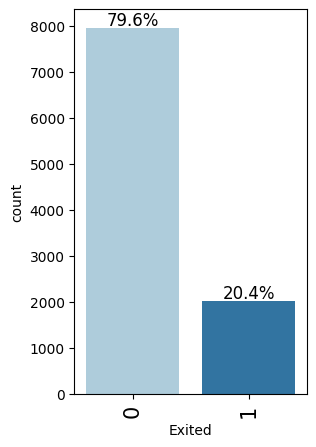

In [ ]:
labeled_barplot(Data, "Exited",perc=True)

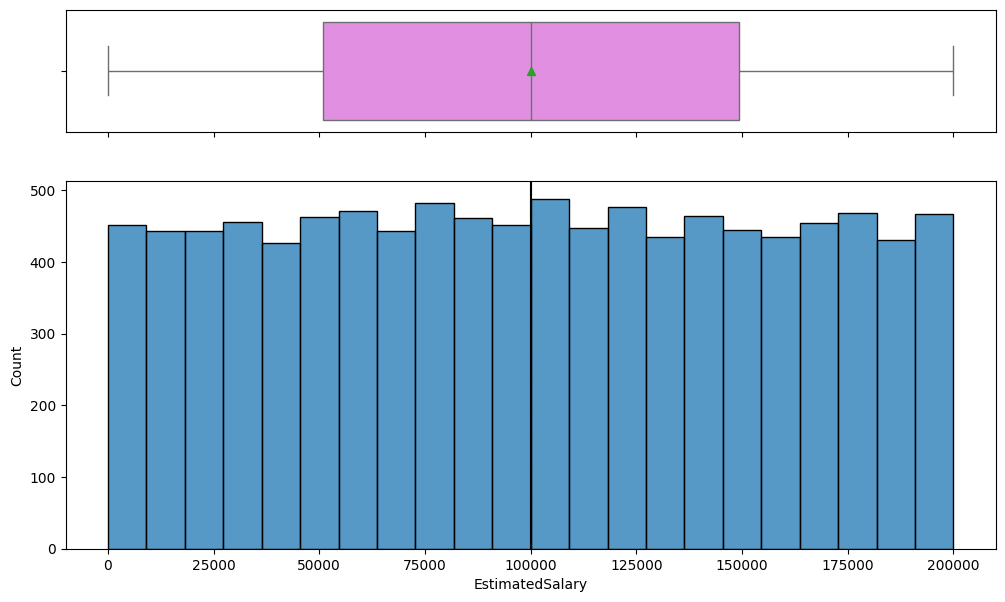

In [ ]:
histogram_boxplot(df,'EstimatedSalary')

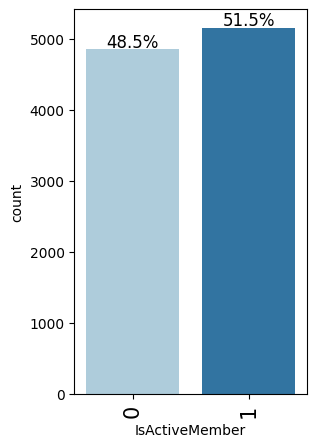

In [ ]:
labeled_barplot(Data, "IsActiveMember",perc=True)

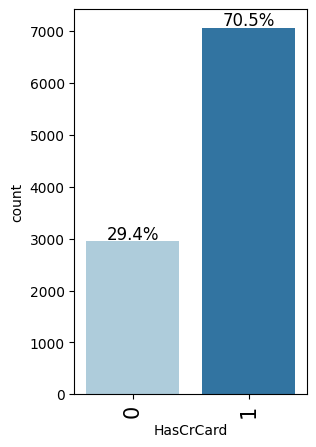

In [ ]:
labeled_barplot(Data, "HasCrCard",perc=True)

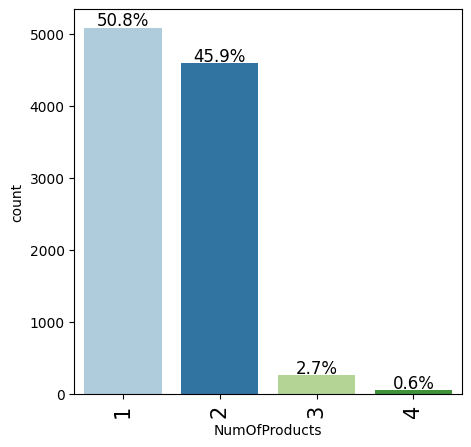

In [ ]:
labeled_barplot(Data, "NumOfProducts",perc=True)

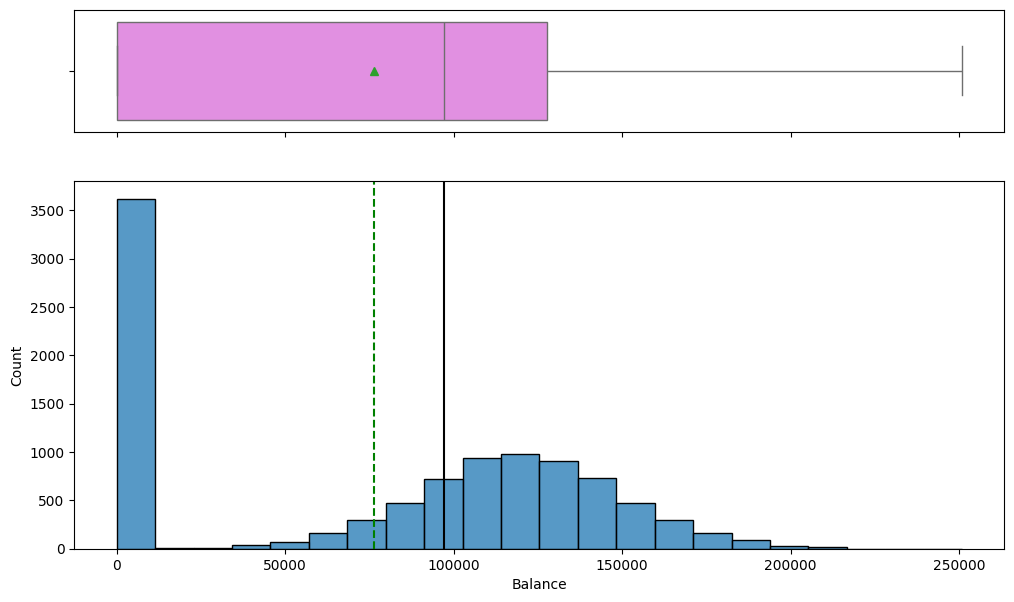

In [ ]:
histogram_boxplot(df,'Balance')

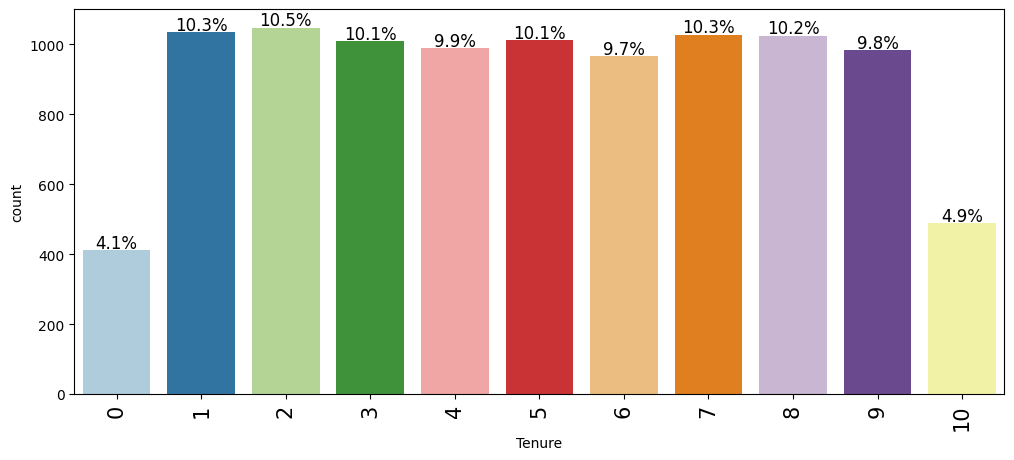

In [ ]:
labeled_barplot(Data, "Tenure",perc=True)

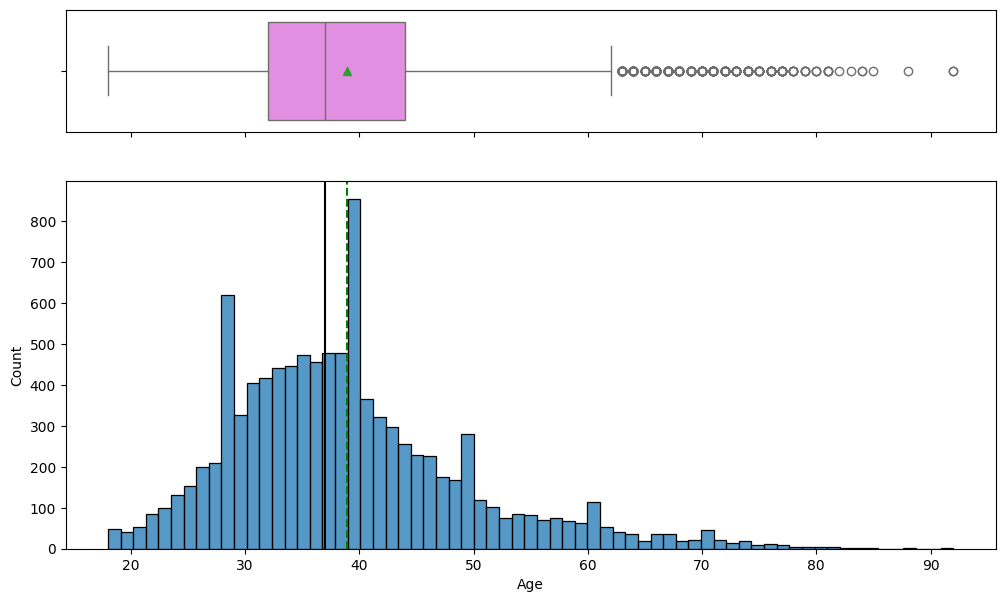

In [ ]:
histogram_boxplot(df,'Age')

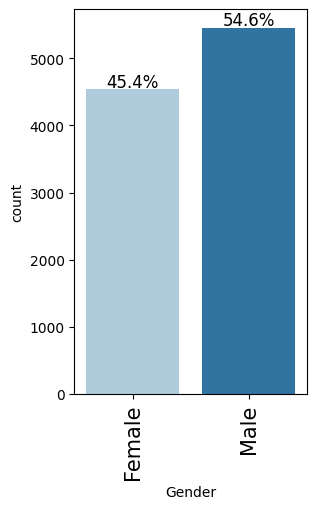

In [ ]:
labeled_barplot(Data, "Gender",perc=True)

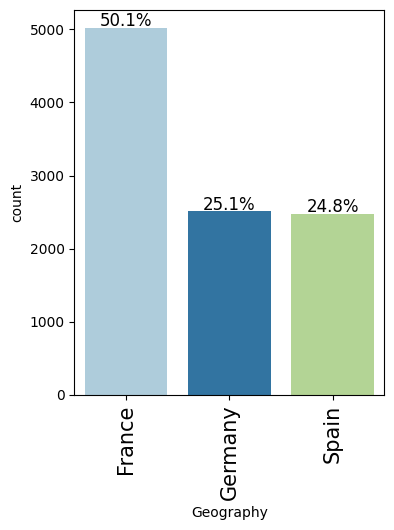

In [ ]:
labeled_barplot(Data, "Geography",perc=True)

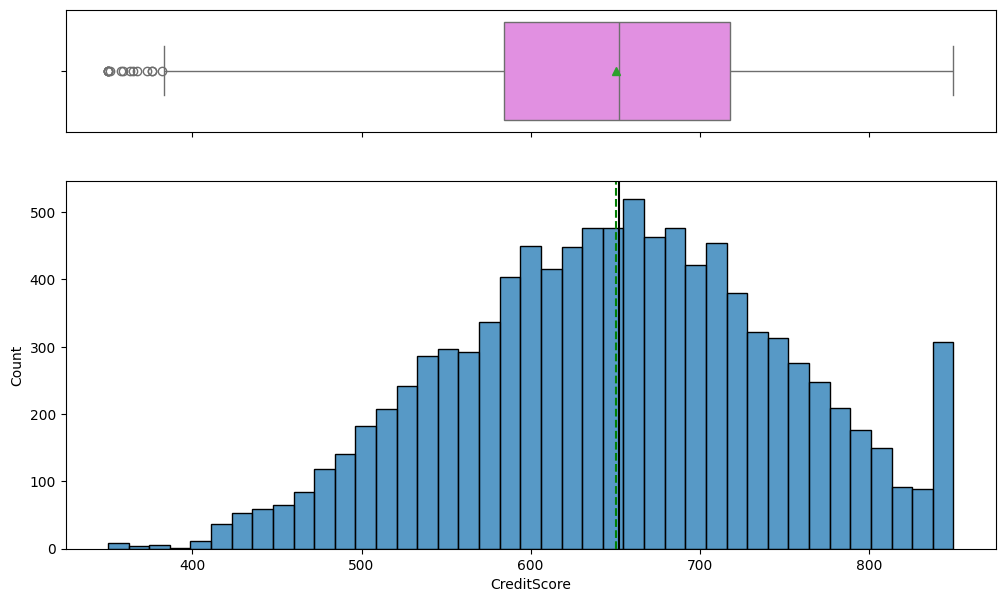

In [ ]:
histogram_boxplot(df,'CreditScore')

### Bivariate Analysis

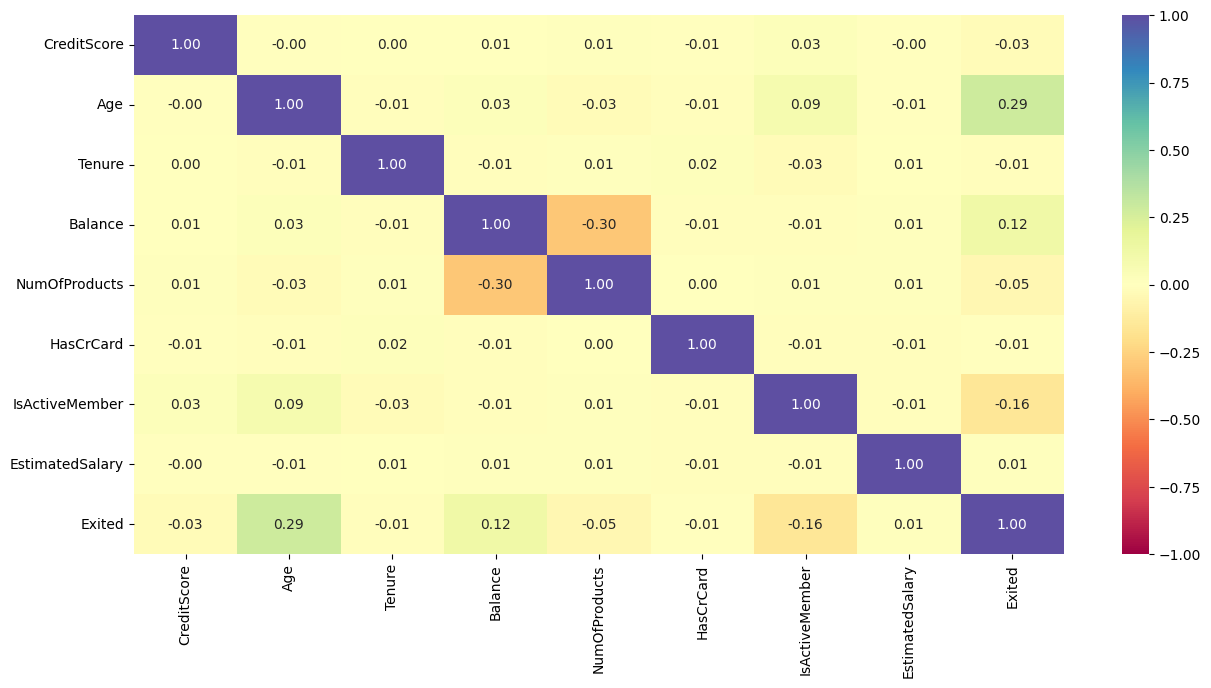

In [ ]:
#Filter numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

#Calculate correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

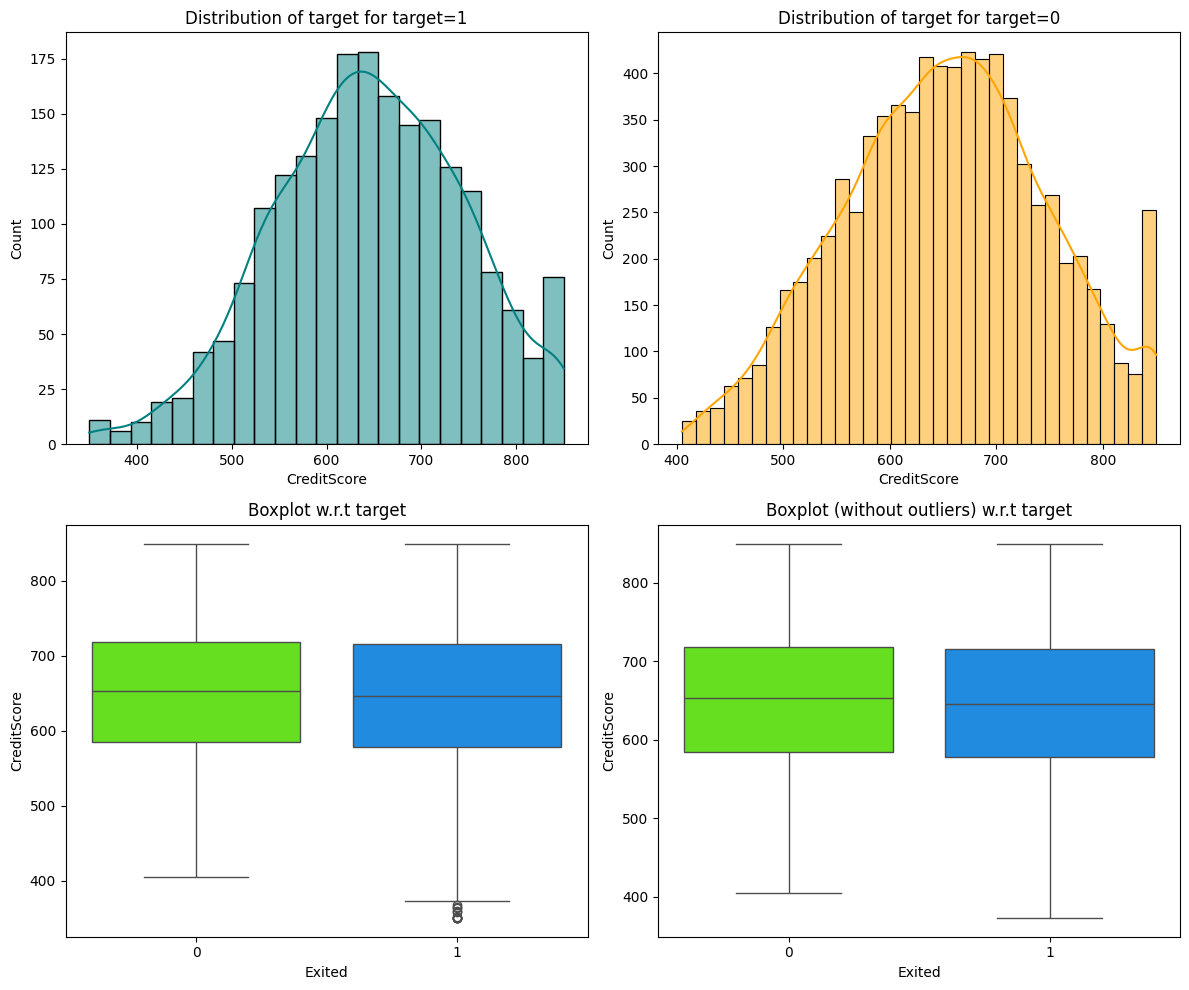

In [ ]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


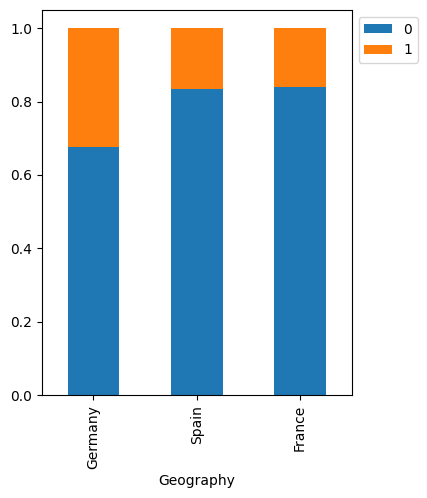

In [ ]:
stacked_barplot(df, "Geography", "Exited" )

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


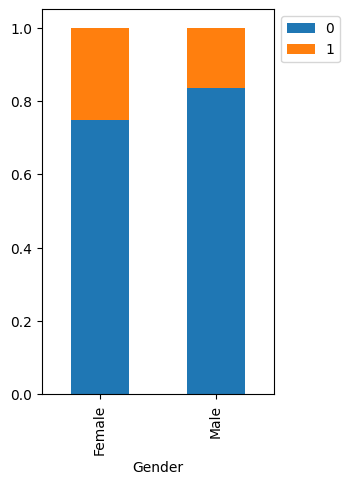

In [ ]:
stacked_barplot(df, "Gender", "Exited" )

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


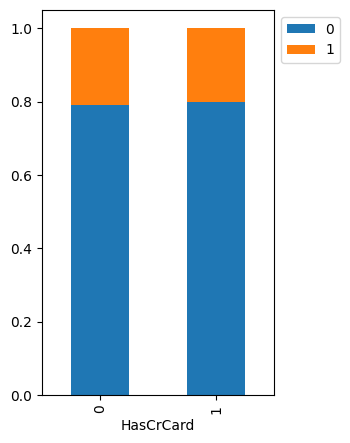

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited" )

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


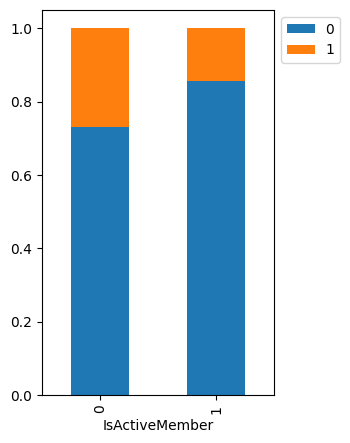

In [ ]:
stacked_barplot(df, "IsActiveMember", "Exited" )

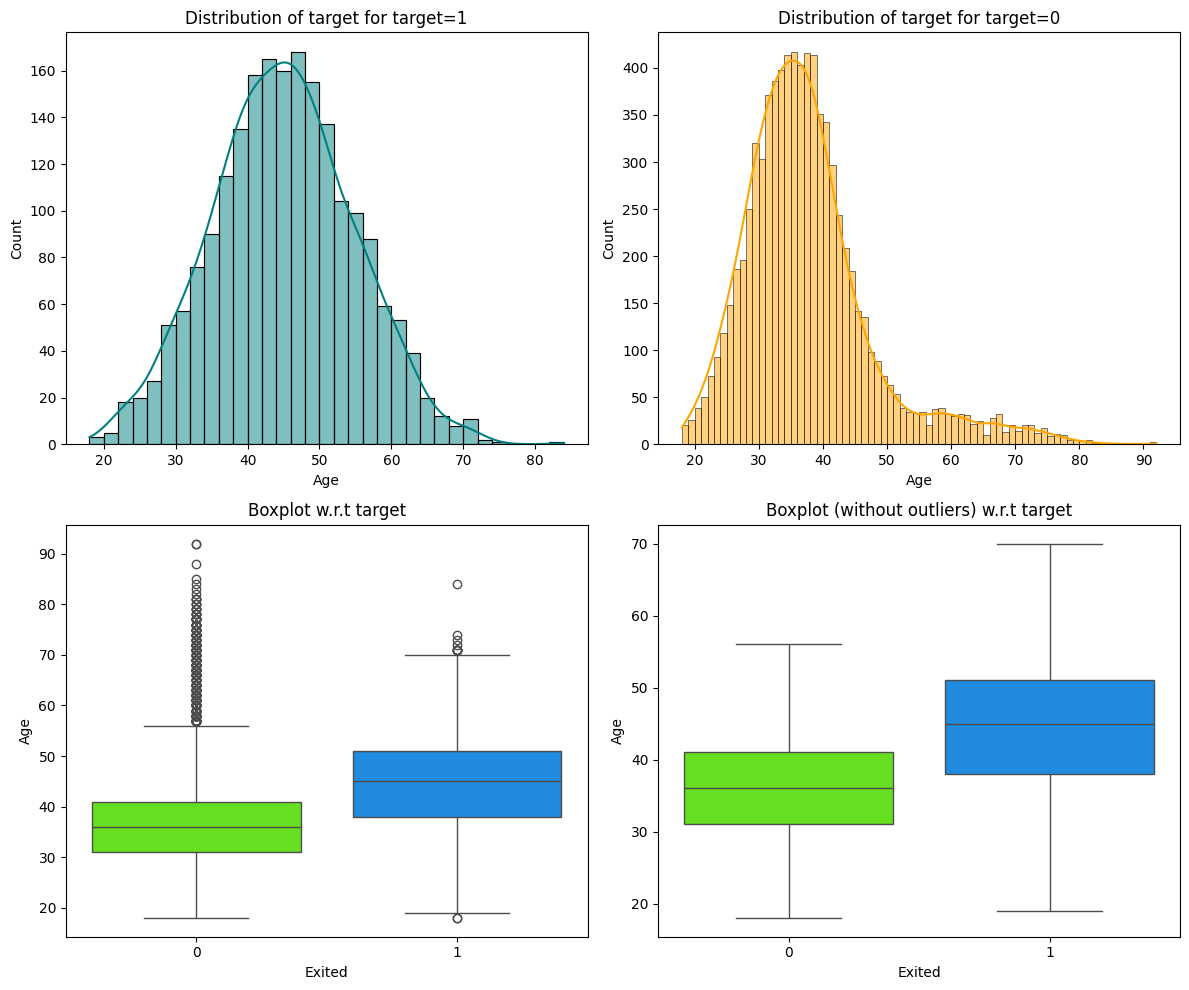

In [ ]:
distribution_plot_wrt_target(df, "Age", "Exited")

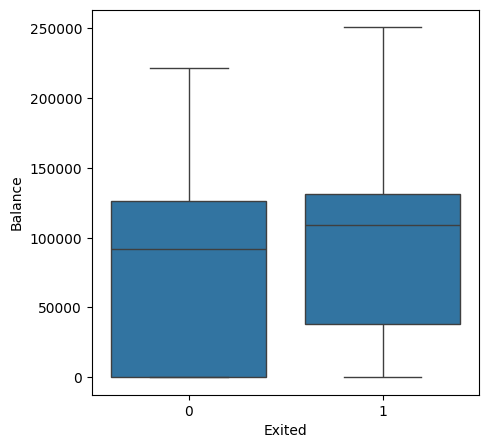

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

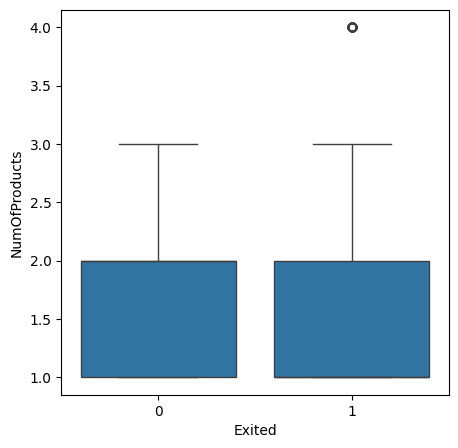

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)
plt.show()

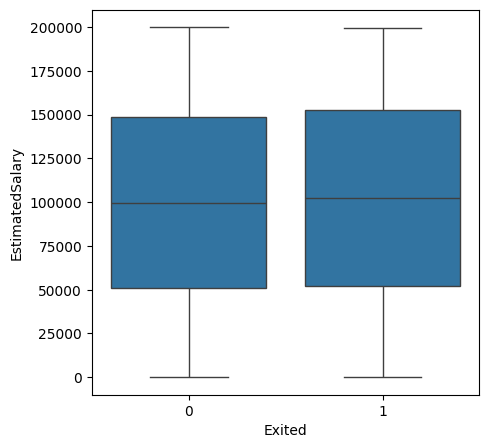

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)
plt.show()

## Data Preprocessing

### Train-validation-test Split

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770
9997,709,France,Female,36,7,0.000,1,0,1,42085.580
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 1-(5/6), random_state = 42, stratify=y, shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 1-(5/6), random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6944, 10) (1389, 10) (1667, 10)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6944,) (1389,) (1667,)


### Dummy Variable Creation

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

### Data Normalization

Normalization is necessary for columns like "CreditScore," "Age," "Tenure," "Balance," and "EstimatedSalary" because they exhibit varying scales and ranges of values.

**CreditScore:** Ranges from 350 to 850.

**Age:** Ranges from 18 to 92.

**Tenure:** Ranges from 0 to 10.

**Balance:** Ranges from 0 to 250,898.09.

**EstimatedSalary:** Ranges from 11.58 to 199,992.48.

These ranges demonstrate the significant differences in scales across the columns, highlighting the need for normalization to ensure fair and effective learning in the model.

In [ ]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

### Utility functions

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

**MODELS TO BUILD**

Model with Adam optimizer

Model with Adam optimizer and Dropout

Model with balanced data by applying SMOTE and SGD optimizer

Model with balanced data by applying SMOTE and Adam optimizer

Model with balanced data by applying SMOTE, Adam optimizer, and Dropout

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Model Evaluation Criterion

The potential consequences of model errors include:

**False Positive:** Predicting a customer will churn when they actually don't, leading to unnecessary retention efforts and potentially alienating the customer.

**False Negative:** Failing to predict churn for a customer who actually churns, resulting in loss of revenue and potential damage to the bank's reputation.

**False Negatives have a greater impact.**

To mitigate the risk of false negatives, the bank should aim to maximize recall. Higher recall means minimizing false negatives, which can be achieved by optimizing the model to capture as many true churn cases as possible. Hence, the focus should be on increasing recall or minimizing false negatives.

In [ ]:
batch_size = 32
epochs = 50

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(64,activation="tanh"))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN
start = time.time()
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose=1
)
end=time.time()

Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6675 - recall: 0.2734 - val_loss: 0.5566 - val_recall: 0.0000e+00
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5353 - recall: 0.0000e+00 - val_loss: 0.5081 - val_recall: 0.0000e+00
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4958 - recall: 0.0000e+00 - val_loss: 0.4912 - val_recall: 0.0000e+00
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4804 - recall: 0.0000e+00 - val_loss: 0.4835 - val_recall: 0.0000e+00
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4724 - recall: 0.0000e+00 - val_loss: 0.4791 - val_recall: 0.0000e+00
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4672 - recall: 0.0000e+00 - val_loss: 0.4759 - val_recall: 0.0000e+00
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4633 - recall: 0.0000e+00 - val_loss: 0.4733 - val_recall: 0.0000e+00
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4599 - recall: 0.0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.63402080535889


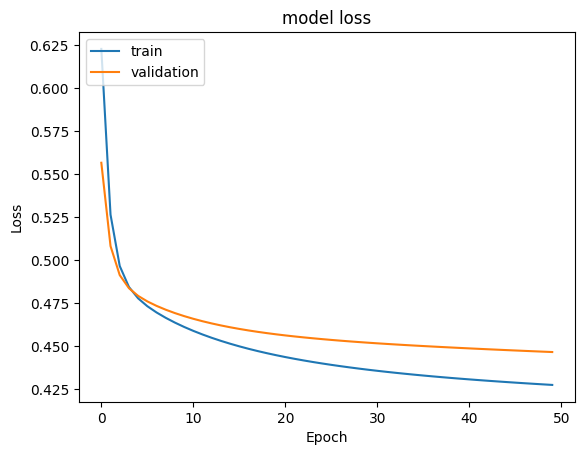

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

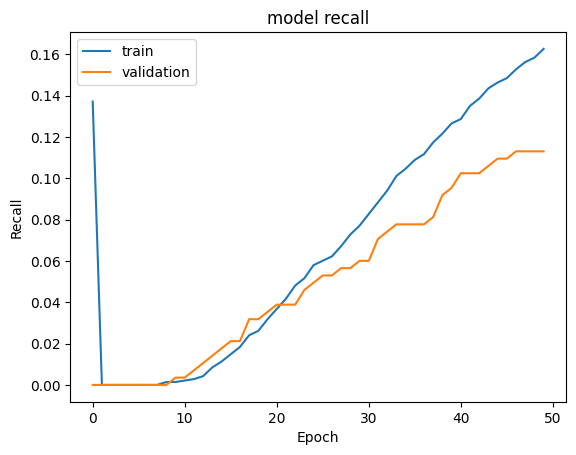

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [ ]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5530
           1       0.60      0.17      0.26      1414

    accuracy                           0.81      6944
   macro avg       0.71      0.57      0.58      6944
weighted avg       0.77      0.81      0.76      6944



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1106
           1       0.46      0.11      0.18       283

    accuracy                           0.79      1389
   macro avg       0.64      0.54      0.53      1389
weighted avg       0.74      0.79      0.74      1389



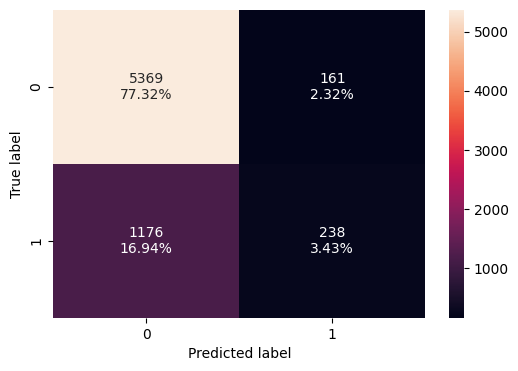

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

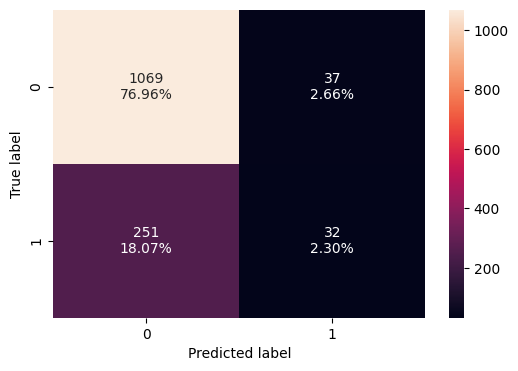

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='tanh'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

metric = [metrics.BinaryAccuracy(), metrics.Recall()]


In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
start = time.time()
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=batch_size, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=epochs, ## Complete the code to specify the number of epochs
    verbose=1
)
end=time.time()

Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4567 - recall: 0.1260 - val_loss: 0.4302 - val_recall: 0.1873
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3989 - recall: 0.2885 - val_loss: 0.4126 - val_recall: 0.2403
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3822 - recall: 0.3268 - val_loss: 0.3997 - val_recall: 0.2933
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3692 - recall: 0.3542 - val_loss: 0.3899 - val_recall: 0.3216
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590 - recall: 0.3846 - val_loss: 0.3833 - val_recall: 0.3604
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3512 - recall: 0.4091 - val_loss: 0.3791 - val_recall: 0.3922
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3449 - recall: 0.4367 - val_loss: 0.3769 - val_recall: 0.4311
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3397 - recall: 0.4522 - val_loss: 0.3748 - val_recall: 0.4488
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  37.98842906951904


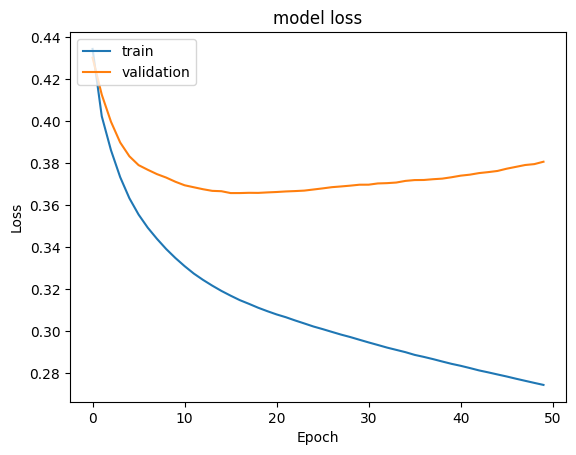

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

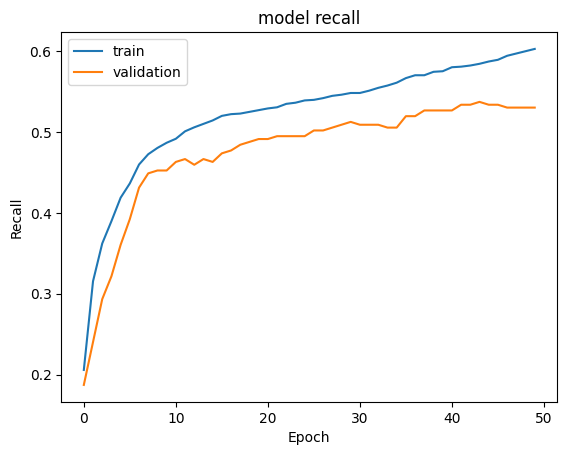

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5530
           1       0.78      0.66      0.71      1414

    accuracy                           0.89      6944
   macro avg       0.85      0.80      0.82      6944
weighted avg       0.89      0.89      0.89      6944



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1106
           1       0.64      0.53      0.58       283

    accuracy                           0.84      1389
   macro avg       0.76      0.73      0.74      1389
weighted avg       0.83      0.84      0.84      1389



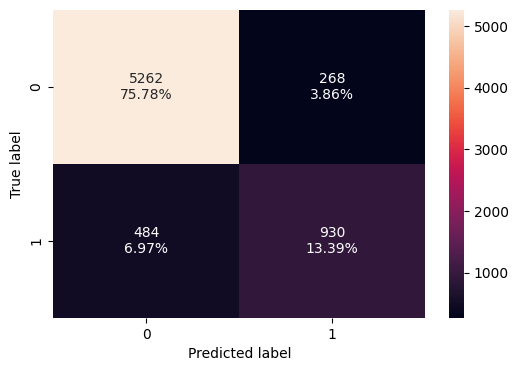

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

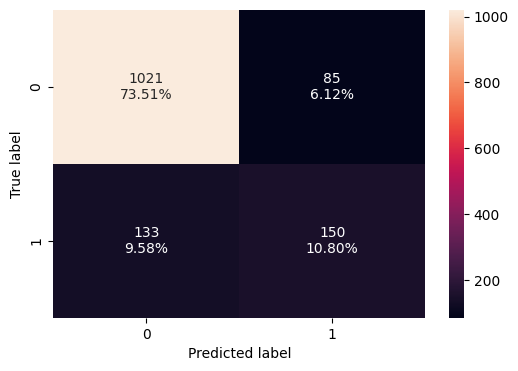

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(dropout_rate))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64,activation='tanh'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(128,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(dropout_rate))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64,activation='tanh'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

metric = ['binary_accuracy', metrics.Recall()]


In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,137 (74.75 KB)

 Trainable params: 19,137 (74.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
start = time.time()
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val))
end=time.time()


Epoch 1/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.7815 - loss: 0.4780 - recall: 0.1067 - val_binary_accuracy: 0.8128 - val_loss: 0.4418 - val_recall: 0.1590
Epoch 2/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8117 - loss: 0.4246 - recall: 0.1790 - val_binary_accuracy: 0.8222 - val_loss: 0.4331 - val_recall: 0.1908
Epoch 3/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8229 - loss: 0.4103 - recall: 0.2451 - val_binary_accuracy: 0.8258 - val_loss: 0.4316 - val_recall: 0.2650
Epoch 4/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8297 - loss: 0.4006 - recall: 0.3059 - val_binary_accuracy: 0.8301 - val_loss: 0.4133 - val_recall: 0.2756
Epoch 5/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8336 - loss: 0.3919 - recall: 0.3166 - val_binary_accuracy: 0.8351 - val_loss: 0.4126 - val_recall: 0.3180
Epoch 6/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8322 - loss: 0.3886 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  110.00846982002258


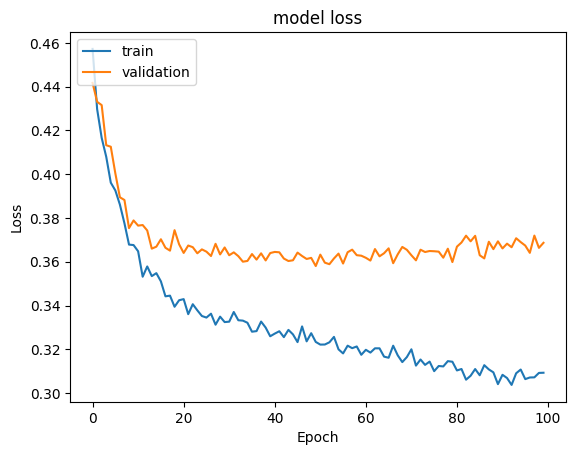

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

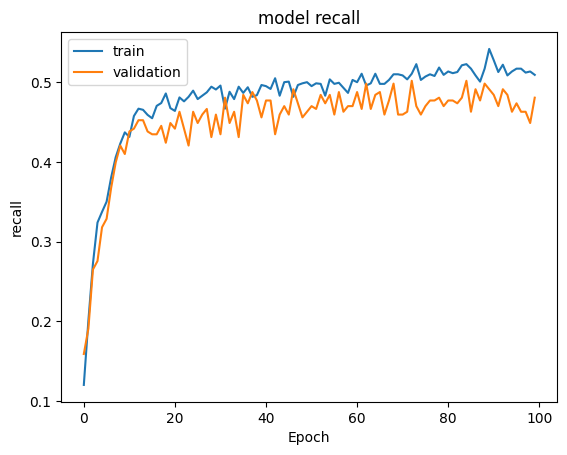

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5530
           1       0.83      0.57      0.67      1414

    accuracy                           0.89      6944
   macro avg       0.86      0.77      0.80      6944
weighted avg       0.88      0.89      0.88      6944



In [ ]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1106
           1       0.74      0.48      0.58       283

    accuracy                           0.86      1389
   macro avg       0.81      0.72      0.75      1389
weighted avg       0.85      0.86      0.85      1389



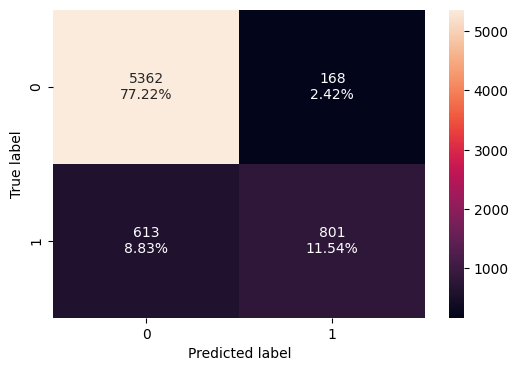

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

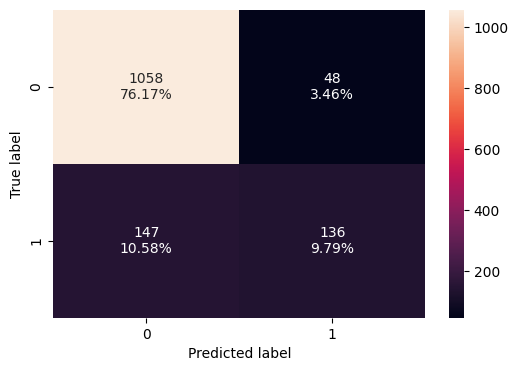

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.

In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11060, 11)
After UpSampling, the shape of train_y: (11060,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(64,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()
metric = ['binary_accuracy', metrics.Recall()]

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss=BinaryCrossentropy(), optimizer=optimizer, metrics=metric)

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
start = time.time()
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)
end=time.time()

Epoch 1/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.5060 - loss: 0.7006 - recall: 0.0850 - val_binary_accuracy: 0.7372 - val_loss: 0.6711 - val_recall: 0.1484
Epoch 2/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.5289 - loss: 0.6944 - recall: 0.1608 - val_binary_accuracy: 0.7163 - val_loss: 0.6714 - val_recall: 0.1908
Epoch 3/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5637 - loss: 0.6889 - recall: 0.2554 - val_binary_accuracy: 0.7163 - val_loss: 0.6698 - val_recall: 0.3074
Epoch 4/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5938 - loss: 0.6837 - recall: 0.3388 - val_binary_accuracy: 0.7120 - val_loss: 0.6668 - val_recall: 0.3675
Epoch 5/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6267 - loss: 0.6785 - recall: 0.4222 - val_binary_accuracy: 0.7207 - val_loss: 0.6629 - val_recall: 0.4346
Epoch 6/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6481 - loss: 0.6731 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  118.6256251335144


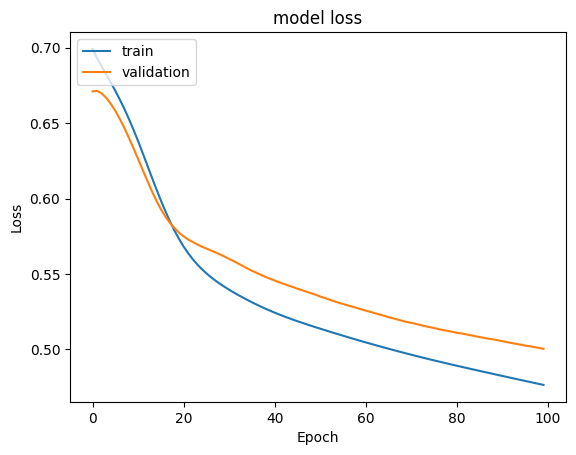

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

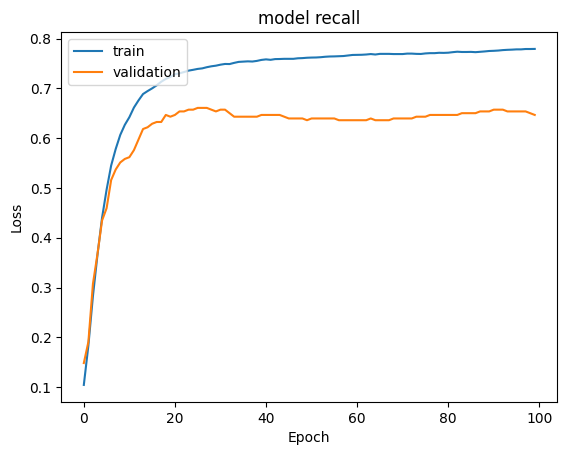

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5530
           1       0.78      0.78      0.78      5530

    accuracy                           0.78     11060
   macro avg       0.78      0.78      0.78     11060
weighted avg       0.78      0.78      0.78     11060



In [ ]:
cr=classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1106
           1       0.43      0.65      0.51       283

    accuracy                           0.75      1389
   macro avg       0.66      0.71      0.67      1389
weighted avg       0.80      0.75      0.77      1389



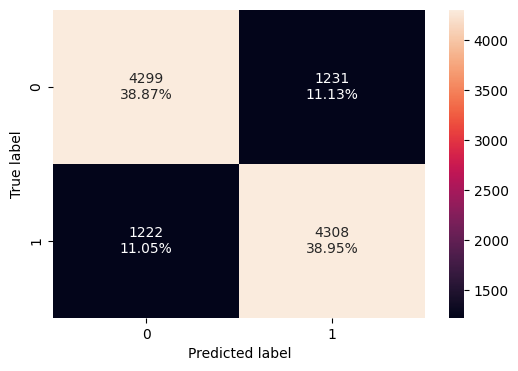

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

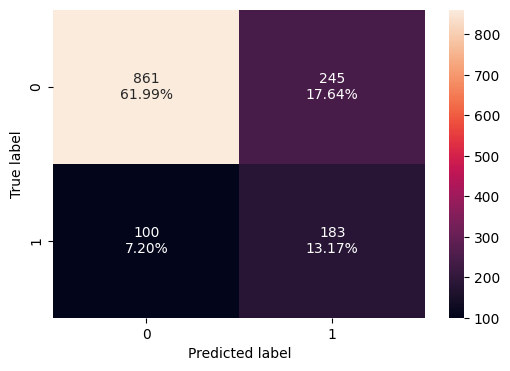

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(128,activation='tanh'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,369 (103.00 KB)

 Trainable params: 26,369 (103.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()
metric=['accuracy', metrics.Recall()]

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss=BinaryCrossentropy(),optimizer=optimizer,metrics=metric)

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,369 (103.00 KB)

 Trainable params: 26,369 (103.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
start = time.time()
history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=epochs,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)
end=time.time()

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7090 - loss: 0.5681 - recall: 0.7105 - val_accuracy: 0.6955 - val_loss: 0.6050 - val_recall: 0.7703
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7675 - loss: 0.4809 - recall: 0.7649 - val_accuracy: 0.7250 - val_loss: 0.5519 - val_recall: 0.7951
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4409 - recall: 0.7938 - val_accuracy: 0.7466 - val_loss: 0.5200 - val_recall: 0.7915
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4156 - recall: 0.8153 - val_accuracy: 0.7567 - val_loss: 0.5037 - val_recall: 0.7845
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8166 - loss: 0.4008 - recall: 0.8224 - val_accuracy: 0.7631 - val_loss: 0.4882 - val_recall: 0.7668
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.3906 - recall: 0.8282 - val_accuracy: 0.7725 - val_loss: 0.4831 - val_recall: 0.7562
Epoc

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.209702491760254


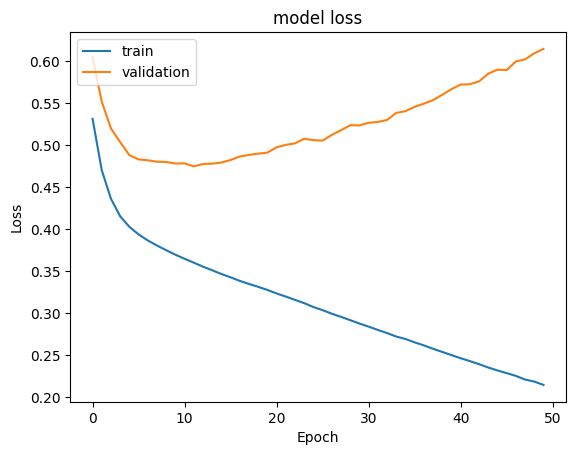

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

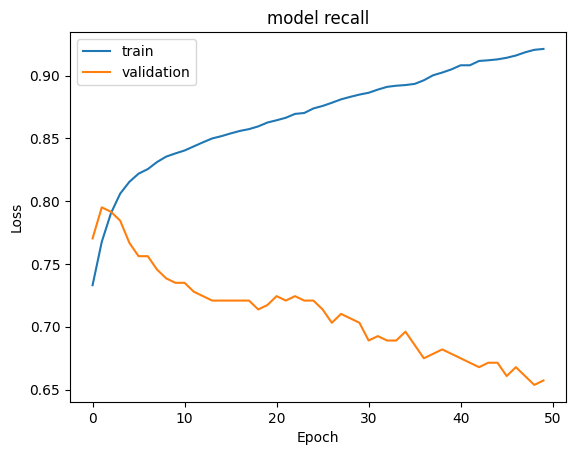

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5530
           1       0.88      0.94      0.91      5530

    accuracy                           0.91     11060
   macro avg       0.91      0.91      0.91     11060
weighted avg       0.91      0.91      0.91     11060



In [ ]:
cr=classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1106
           1       0.47      0.66      0.55       283

    accuracy                           0.78      1389
   macro avg       0.69      0.73      0.70      1389
weighted avg       0.81      0.78      0.79      1389



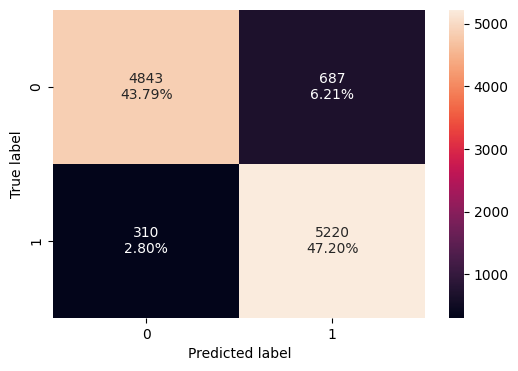

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

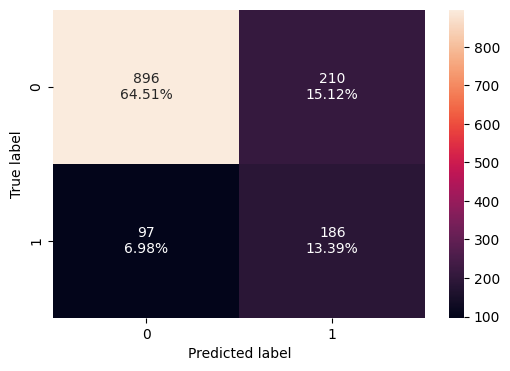

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(64,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

metric = ['accuracy',metrics.Recall()]

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss=BinaryCrossentropy(),optimizer=optimizer,metrics=metric)

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,321 (40.32 KB)

 Trainable params: 10,321 (40.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=50, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))
end=time.time()

Epoch 1/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6744 - loss: 0.6010 - recall: 0.6803 - val_accuracy: 0.6767 - val_loss: 0.5893 - val_recall: 0.6890
Epoch 2/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7447 - loss: 0.5153 - recall: 0.7474 - val_accuracy: 0.7127 - val_loss: 0.5788 - val_recall: 0.7597
Epoch 3/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7676 - loss: 0.4836 - recall: 0.7677 - val_accuracy: 0.7336 - val_loss: 0.5407 - val_recall: 0.7597
Epoch 4/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.4647 - recall: 0.7849 - val_accuracy: 0.7365 - val_loss: 0.5383 - val_recall: 0.7633
Epoch 5/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.4543 - recall: 0.7932 - val_accuracy: 0.7451 - val_loss: 0.5169 - val_recall: 0.7703
Epoch 6/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7976 - loss: 0.4436 - recall: 0.8075 - val_accuracy: 0.7725 - val_loss: 0.4866 - val_recall: 0.7420
Epoc

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  86.17285490036011


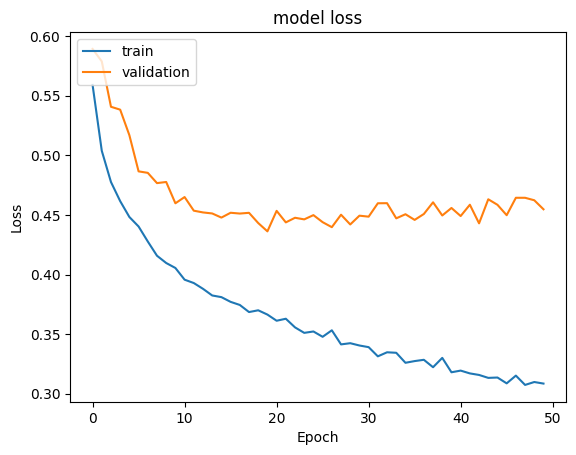

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

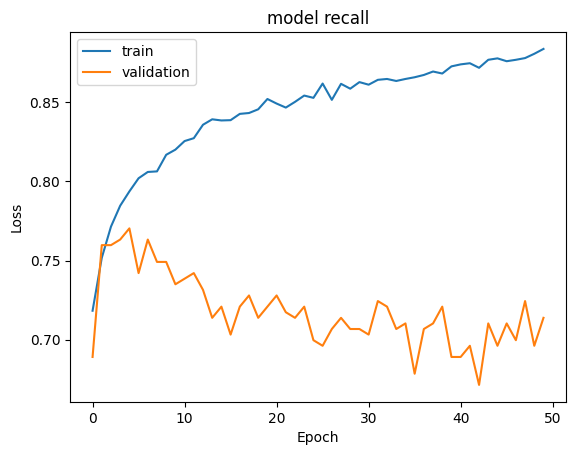

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5530
           1       0.88      0.92      0.90      5530

    accuracy                           0.90     11060
   macro avg       0.90      0.90      0.90     11060
weighted avg       0.90      0.90      0.90     11060



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1106
           1       0.53      0.71      0.61       283

    accuracy                           0.81      1389
   macro avg       0.72      0.78      0.74      1389
weighted avg       0.84      0.81      0.82      1389



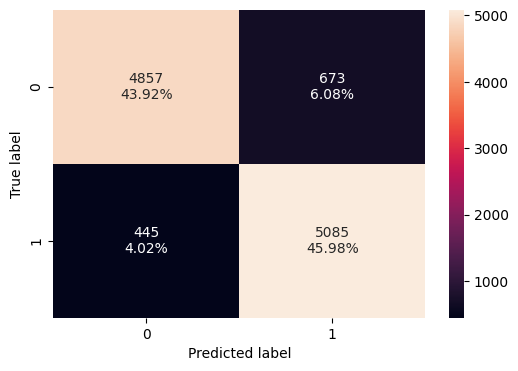

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

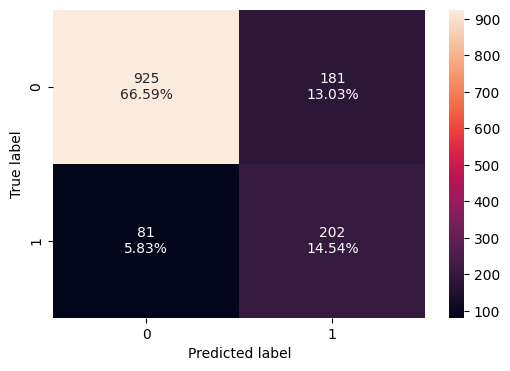

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.168
NN with Adam,0.658
NN with Adam & Dropout,0.566
NN with SMOTE & SGD,0.779
NN with SMOTE & Adam,0.944
"NN with SMOTE,Adam & Dropout",0.920


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.113
NN with Adam,0.530
NN with Adam & Dropout,0.481
NN with SMOTE & SGD,0.647
NN with SMOTE & Adam,0.657
"NN with SMOTE,Adam & Dropout",0.714


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.055
NN with Adam,0.128
NN with Adam & Dropout,0.086
NN with SMOTE & SGD,0.132
NN with SMOTE & Adam,0.287
"NN with SMOTE,Adam & Dropout",0.206


In [ ]:
y_test_pred = model_5.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [False]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1327
           1       0.54      0.68      0.60       340

    accuracy                           0.82      1667
   macro avg       0.72      0.77      0.74      1667
weighted avg       0.84      0.82      0.82      1667



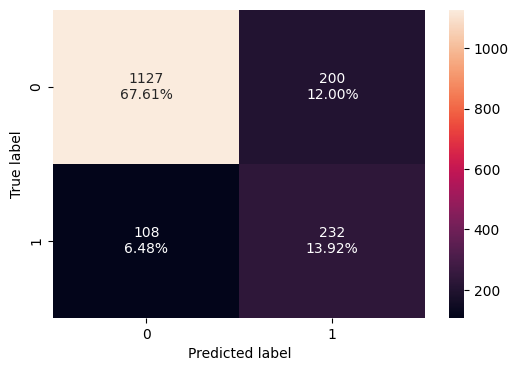

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Findings

**Winning Model Performance Metrics:**

**Accuracy:** The model achieved an accuracy of approximately 82%, indicating that it correctly classified 82% of the instances in the test dataset.

**Precision:** For predicting churn (class 1), the precision is 54%, implying that when the model predicts churn, it is correct 54% of the time. For non-churn (class 0), the precision is 91%.

**Recall:** The recall for churn (class 1) is 68%, meaning that the model identified 68% of the actual churn cases correctly. For non-churn (class 0), the recall is 85%.

**F1-score:** The F1-score, which is the harmonic mean of precision and recall, is 0.60 for churn (class 1) and 0.88 for non-churn (class 0).


## Actionable Insights and Business Recommendations

**Business Recommendation**

Precision and Recall Balance:
The model demonstrates a trade-off between precision and recall. While it achieves a high precision for non-churn customers, the precision for churn prediction is relatively lower. However, it manages to capture a significant portion of actual churn cases with a reasonable recall. This indicates that the model can effectively identify potential churners, albeit with some misclassifications.

**Focus on Recall Improvement:**
To improve the model's performance further, particularly in identifying churn cases, focus should be placed on improving recall without significantly sacrificing precision. This can be achieved through strategies such as feature engineering, exploring different model architectures, adjusting class weights, or collecting more diverse data.

**Utilizing Predictions for Customer Retention:**
Despite its limitations, the model can still provide valuable insights for the bank's customer retention strategies. By leveraging the model predictions, the bank can prioritize efforts towards retaining customers who are predicted to churn, offering tailored incentives, personalized communication, or targeted marketing campaigns to mitigate churn risk.

**Continuous Model Monitoring and Improvement:**
It's essential to continuously monitor the model's performance and retrain it periodically with updated data. As customer behavior evolves over time, the model needs to adapt to capture new patterns and trends accurately. Regular evaluation and refinement of the model will ensure its effectiveness in supporting the bank's customer retention efforts.

**Conclusion:**
While Model 5 provides a solid foundation for predicting customer churn, there's room for improvement to enhance its predictive power and applicability in real-world business scenarios. By focusing on refining the model and integrating its predictions into strategic decision-making processes, the bank can proactively address churn risk and foster long-term customer relationships.

*



<font size=6 color='blue'>Power Ahead</font>
___